In [1]:
# Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set3')
from matplotlib import style
style.use('ggplot')

In [8]:
lung_df = pd.read_csv('./cancer patient data sets.csv')

lung_df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [9]:
#lung_df.info()

lung_df.drop(['index', 'Patient Id'], axis=1, inplace=True)
lung_df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [4]:
# Describe the data set
#lung_df.describe()

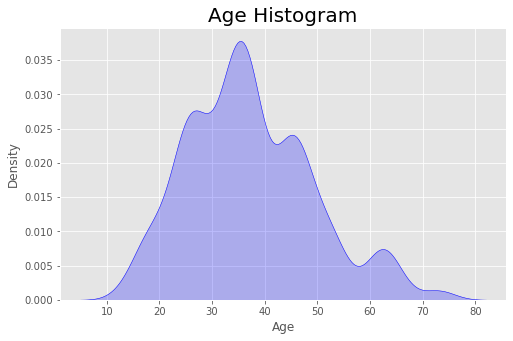

Histogram's skewness is 0.5510959291276972 and kurtosis is 0.059540224308944456


In [10]:
plt.figure(figsize=(8, 5))
sns.kdeplot(lung_df.Age, shade = True, color = 'b')
plt.title('Age Histogram', fontsize = 20)
plt.show()
print("Histogram's skewness is {} and kurtosis is {}".format(lung_df.Age.skew(), lung_df.Age.kurtosis()))

/Users/tom/opt/anaconda3/envs/Python38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Levels')

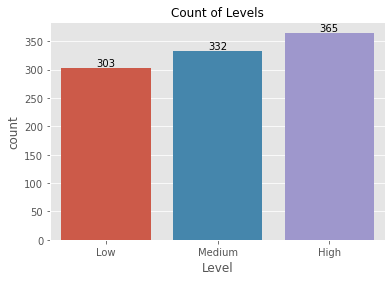

In [11]:
# Distribution of levels
plt.figure(figsize= (6, 4))
ax = sns.countplot(lung_df.Level)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count of Levels', fontsize = 12)

In [15]:
# Replace Level categories with numeric values
lung_df['Level'].replace(to_replace=dict(Low=0, Medium=1, High=2), inplace=True)
lung_df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [46]:
X = lung_df.drop('Level', axis=1)
y = lung_df['Level'].values

#pd.get_dummies(lung_df['Level'])

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [48]:
# Start work on KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_scaler = StandardScaler()
X_scaler.fit(X_train)

StandardScaler()

In [51]:
# Transform the training and testing data by using the X_scaler & y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/1.000 
k: 3, Train/Test Score: 1.000/1.000 
k: 5, Train/Test Score: 1.000/1.000 
k: 7, Train/Test Score: 1.000/1.000 
k: 9, Train/Test Score: 1.000/1.000 
k: 11, Train/Test Score: 0.993/0.980 
k: 13, Train/Test Score: 0.993/0.980 
k: 15, Train/Test Score: 0.965/0.956 
k: 17, Train/Test Score: 0.965/0.956 
k: 19, Train/Test Score: 0.965/0.956 


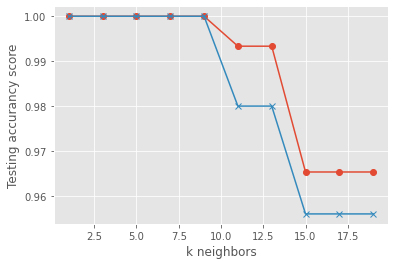

In [52]:
# Loop through different k values to find which has the hightest accurancy.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f} ')

plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker='x')
plt.xlabel('k neighbors')
plt.ylabel('Testing accurancy score')
plt.show()

In [53]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
print('k=11 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=11 Test Acc: 0.980


In [54]:
y_true = y_test
y_pred = knn.predict(X_test_scaled)

In [55]:
confusion_matrix(y_true, y_pred)

array([[78,  0,  0],
       [ 2, 73,  3],
       [ 0,  0, 94]])

In [43]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        78
           1       1.00      0.94      0.97        78
           2       0.97      1.00      0.98        94

   micro avg       0.98      0.98      0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250
 samples avg       0.98      0.98      0.98       250

